# Micro Credit Loan Defaulter Project

## Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

> Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5 percent records, while, label ‘0’ has approximately 12.5 percent records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8 percent of the total data.  

Importing necessary libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading data set from my computer

In [2]:
df = pd.read_csv(r"C:\Users\benem\Desktop\PMT FLIP ROBO\Micro Credit Project\Data file.csv")

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


We're looking at the first five and last five rows of our dataset. It reveals that our dataframe contains a total of 209593 rows and 37 columns. This is a Classification challenge because we have the label column that stores the defaulter and non deafulter values marked with 0 and 1.

# EDA

In [4]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

We want to display all the columns and rows as there are many rows and columns

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


The "Unnamed: 0" column was removed from the dataset since it only stored index data starting at 1 instead of 0 and was not a useful feature column.

In [6]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 209593 Rows and 36 Columns in our dataframe


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Columns Description

- label				: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}
- msisdn			: Mobile number of user
- aon				: Age on cellular network in days
- daily_decr30		: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90		: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30			: Average main account balance over last 30 days
- rental90			: Average main account balance over last 90 days
- last_rech_date_ma	: Number of days till last recharge of main account
- last_rech_date_da	: Number of days till last recharge of data account
- last_rech_amt_ma	: Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30		: Number of times main account got recharged in last 30 days
- fr_ma_rech30		: Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30	: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30		: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30		: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90		: Number of times main account got recharged in last 90 days
- fr_ma_rech90		: Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90	: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90		: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90		: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30		: Number of times data account got recharged in last 30 days
- fr_da_rech30		: Frequency of data account recharged in last 30 days
- cnt_da_rech90		: Number of times data account got recharged in last 90 days
- fr_da_rech90		: Frequency of data account recharged in last 90 days
- cnt_loans30		: Number of loans taken by user in last 30 days
- amnt_loans30		: Total amount of loans taken by user in last 30 days
- maxamnt_loans30	: Maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
- cnt_loans90		: Number of loans taken by user in last 90 days
- amnt_loans90		: Total amount of loans taken by user in last 90 days
- maxamnt_loans90	: Maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
- payback30			: Average payback time in days over last 30 days
- payback90			: Average payback time in days over last 90 days
- pcircle			: Telecom circle
- pdate				: Date

# Checking For Null Values

In [7]:
df.isna().sum() 

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

we have no null values

<AxesSubplot:>

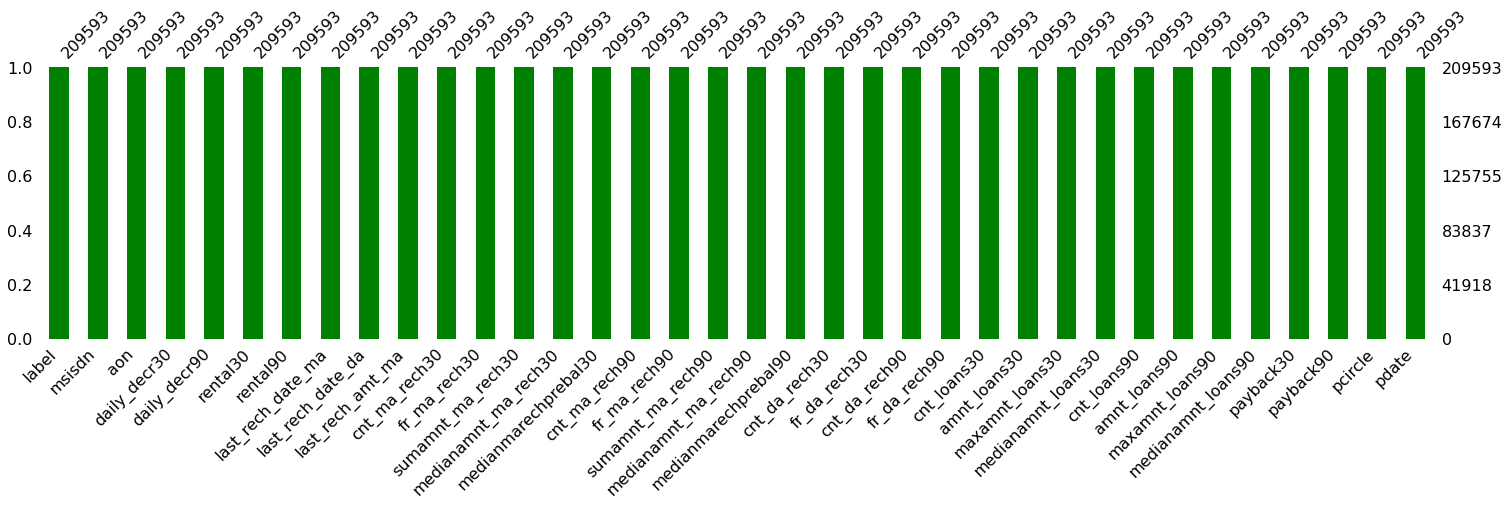

In [8]:
import missingno
missingno.bar(df, figsize = (25,5), color="green")

# Description About the DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

We may confirm the non null count details as well as the datatype information using the info method. We have 21 columns with float/decimal datatypes, 12 columns with integer datatypes, and three columns with object/categorical datatypes. Before we can use the information in our machine learning models, we'll need to convert the object datatype columns to numerical data.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


To check the numerical data specifics, we used the describe technique. There are 33 numerical values in the columns, and it appears that the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile, and maximum value are all mostly properly distributed in terms of data points, but I do see some abnormality that we will confirm with a visual.

Visually describing the numerical columns

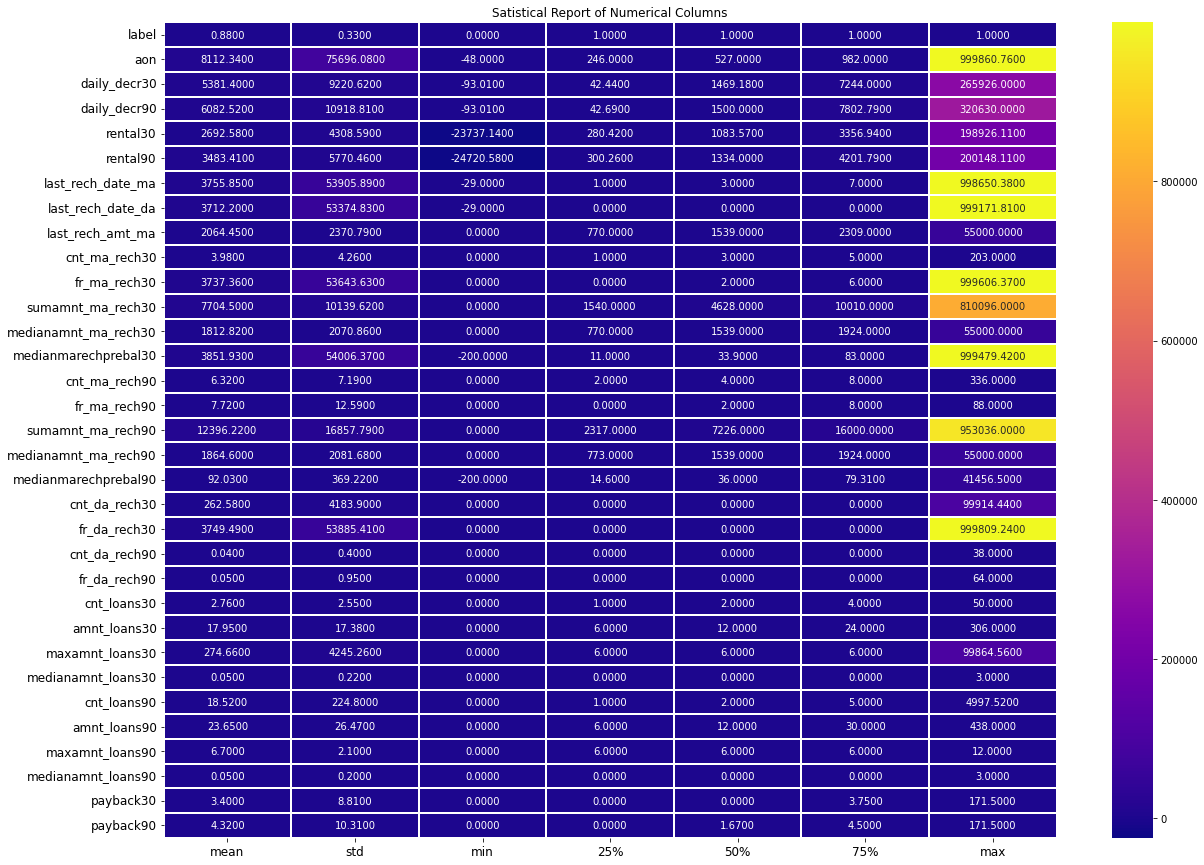

In [11]:
plt.figure(figsize = (20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="plasma")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

The maximum value for columns aon, daily decr30, daily decr90, rental30, rental90, last rech date ma, last rech date da, fr ma rech30, sumamnt ma rech30, medianmarechprebal30, sumamnt ma rech90, and fr da rech30 is significantly higher than the other column values in the aforementioned report.

# Checking Unique Values

In [12]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
pcircle,1
label,2
maxamnt_loans90,3
medianamnt_loans90,6
medianamnt_loans30,6
cnt_da_rech90,27
cnt_loans30,40
fr_da_rech90,46
amnt_loans30,48
amnt_loans90,69


Column pcircle has a single data value filled in all of the items in the above list, and hence does not contribute much to the output label generation.

In [13]:
df.drop("pcircle", axis=1, inplace=True)

The column "pcircle" has been eliminated because it does not contribute to label prediction.

# Visualization

CountPlot

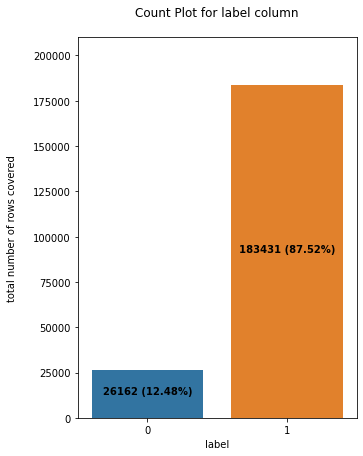

In [14]:
x = 'label'
k=0
plt.figure(figsize=[5,7])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    mr = len(df[x])
    st = f"{ht} ({round(ht*100/mr,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,210000)
plt.title(f'Count Plot for {x} column\n')
plt.ylabel(f'total number of rows covered\n')
plt.show()

Our label data is imbalanced, as shown in the above count plot, and will need to be balanced before we feed information into our classification machine learning models.

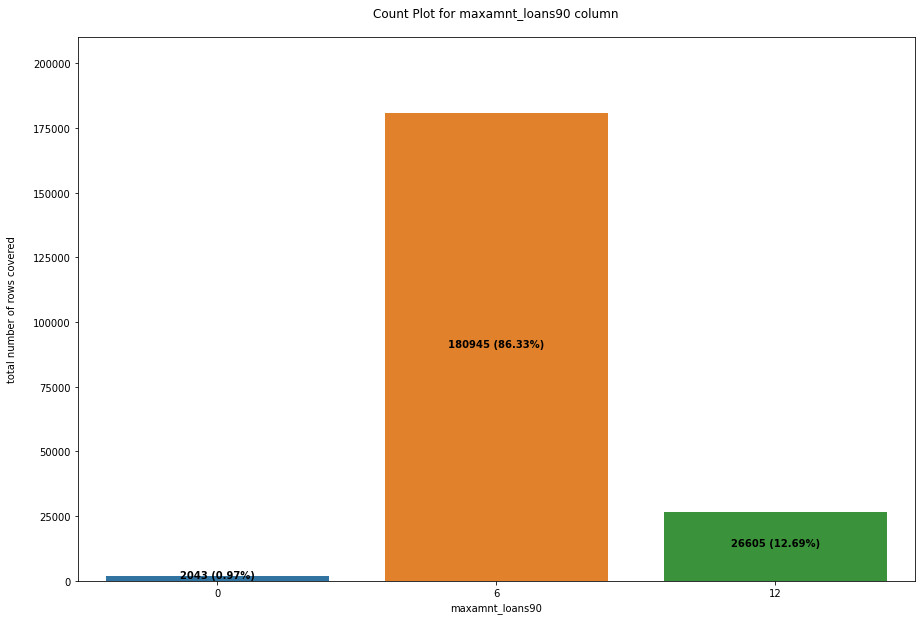

In [15]:
x = 'maxamnt_loans90'
k=0
plt.figure(figsize=[15,10])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    mr = len(df[x])
    st = f"{ht} ({round(ht*100/mr,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,210000)
plt.title(f'Count Plot for {x} column\n')
plt.ylabel(f'total number of rows covered\n')
plt.show()

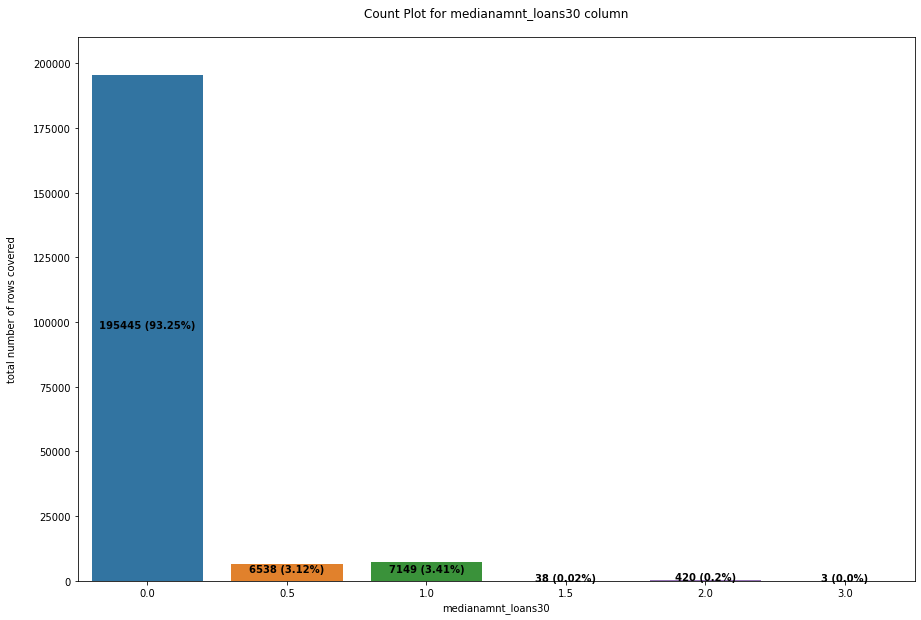

In [16]:
x = 'medianamnt_loans30'
k=0
plt.figure(figsize=[15,10])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    mr = len(df[x])
    st = f"{ht} ({round(ht*100/mr,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,210000)
plt.title(f'Count Plot for {x} column\n')
plt.ylabel(f'total number of rows covered\n')
plt.show()

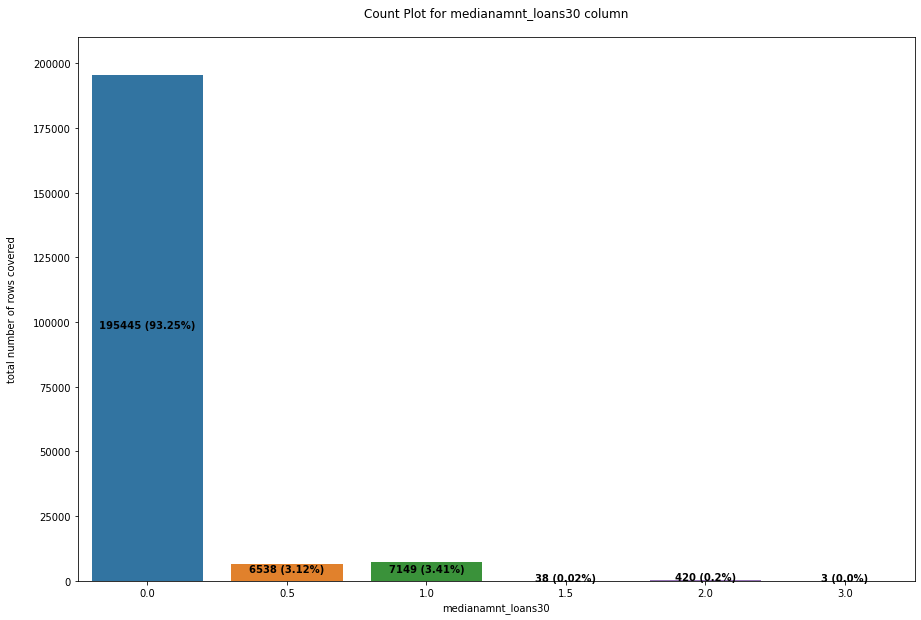

In [17]:
x = 'medianamnt_loans30'
k=0
plt.figure(figsize=[15,10])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    mr = len(df[x])
    st = f"{ht} ({round(ht*100/mr,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,210000)
plt.title(f'Count Plot for {x} column\n')
plt.ylabel(f'total number of rows covered\n')
plt.show()

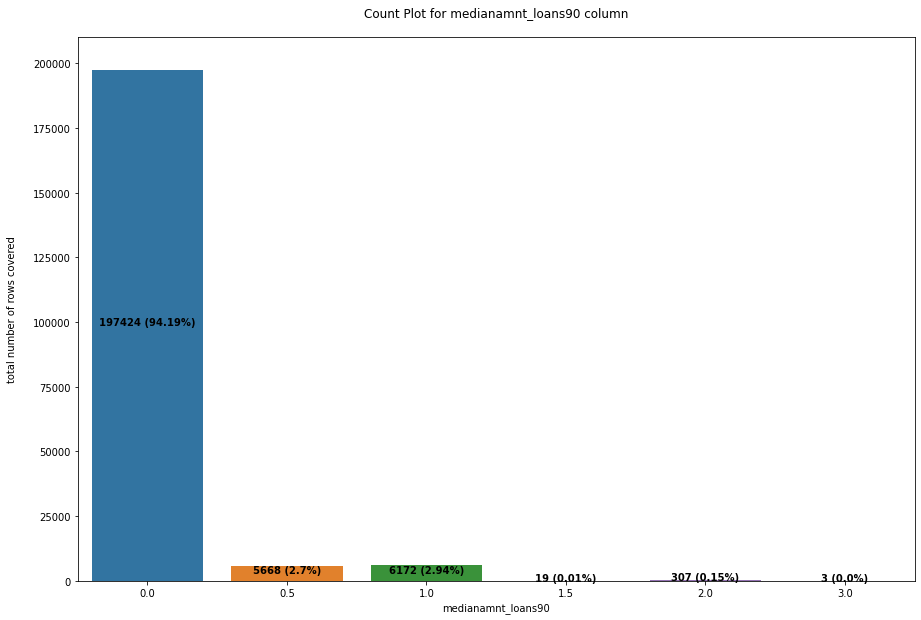

In [18]:
x = 'medianamnt_loans90'
k=0
plt.figure(figsize=[15,10])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    mr = len(df[x])
    st = f"{ht} ({round(ht*100/mr,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,210000)
plt.title(f'Count Plot for {x} column\n')
plt.ylabel(f'total number of rows covered\n')
plt.show()

We can see the categories contained in the columns, as well as the percentage and number of rows covered by each unique value of that column in our dataset, in the above count plots.

BarPlot

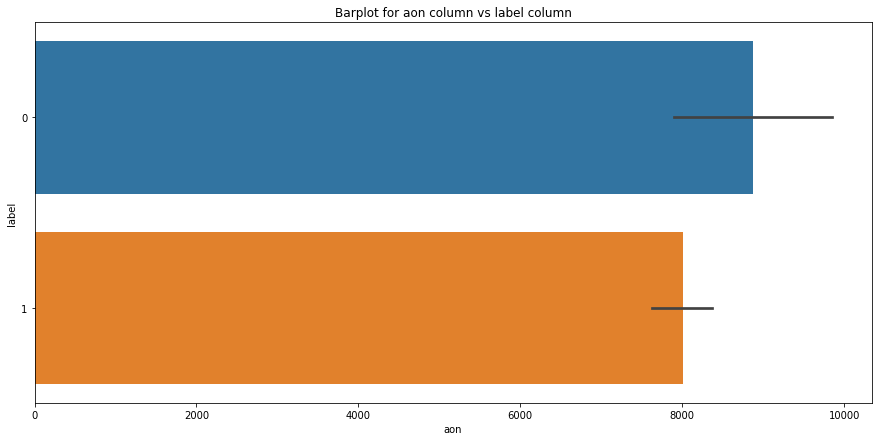

In [19]:
y = 'label'

x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

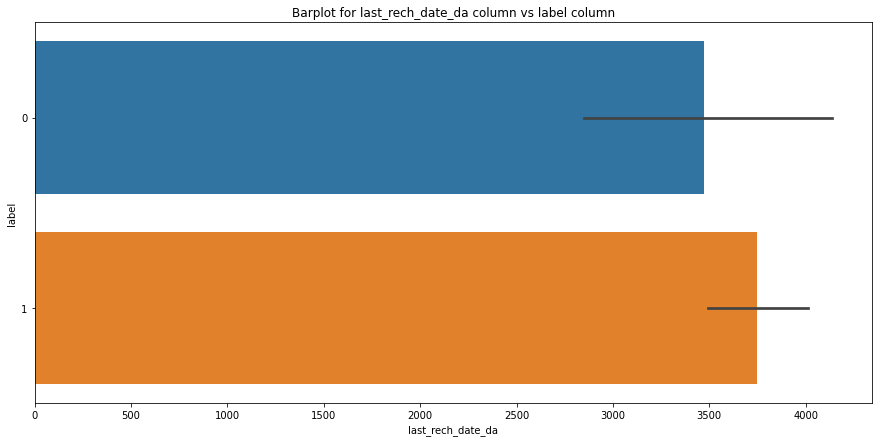

In [20]:
y = 'label'

x = 'last_rech_date_da'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

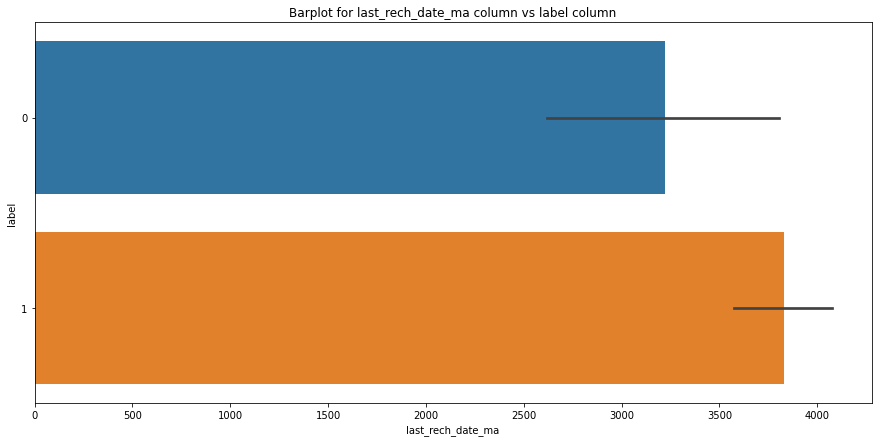

In [21]:
y = 'label'

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

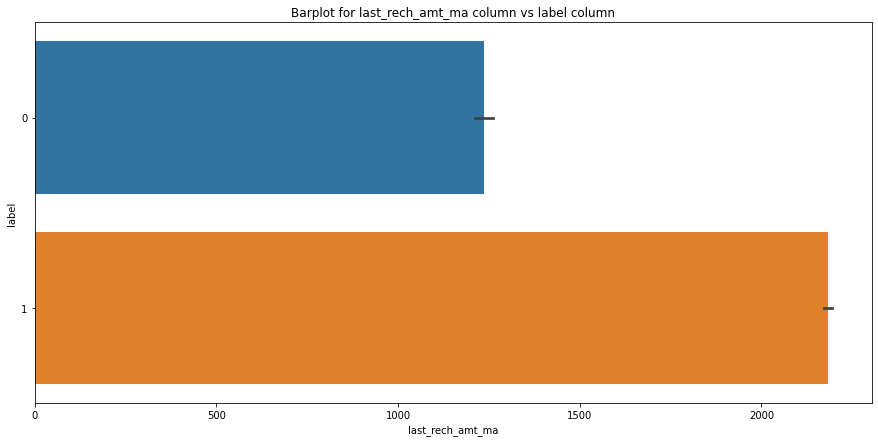

In [22]:
y = 'label'

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The above bar plots demonstrate whether a user was successful or unsuccessful in returning the credit amount based on the given feature columns.

LinePlot

<AxesSubplot:xlabel='msisdn'>

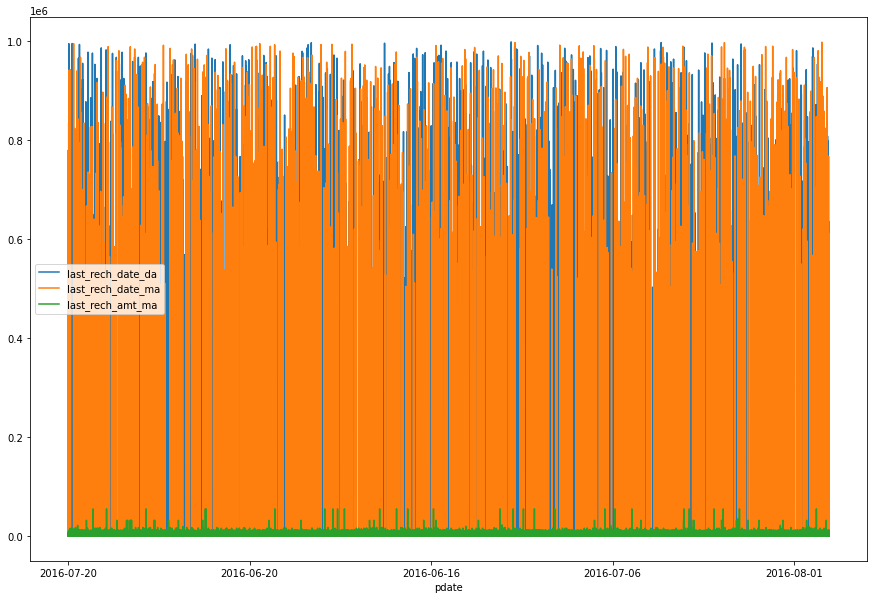

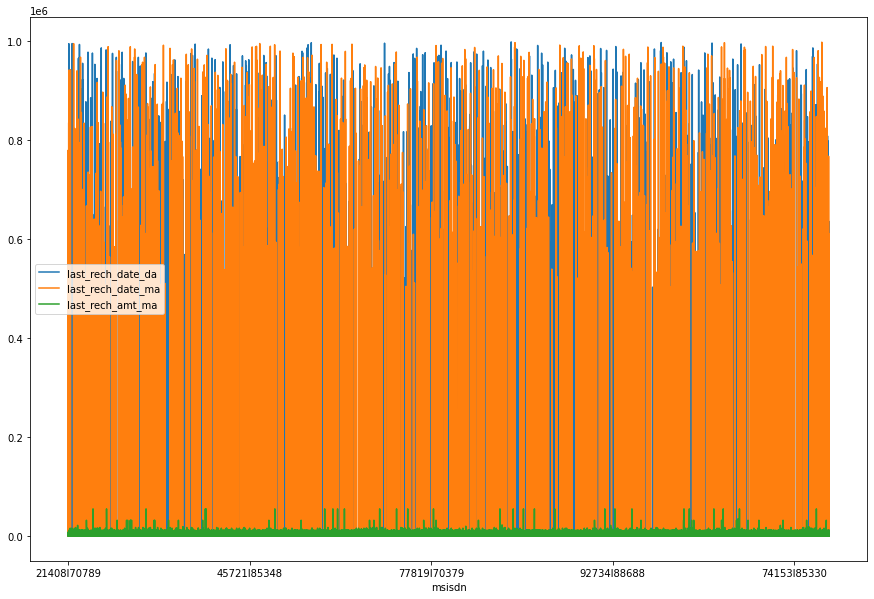

In [23]:
df.plot(kind="line", x="pdate", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[15,10])

df.plot(kind="line", x="msisdn", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[15,10])

Line plots for date and mobile number data with daily and monthly recharge information, as well as the amount factor, are shown below.

Scatterplot

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='sumamnt_ma_rech90'>

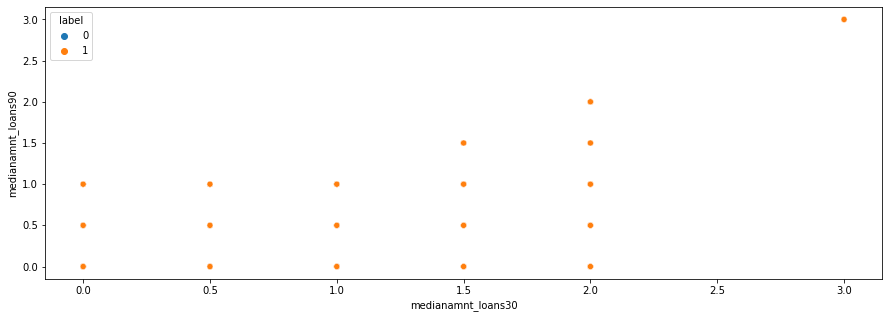

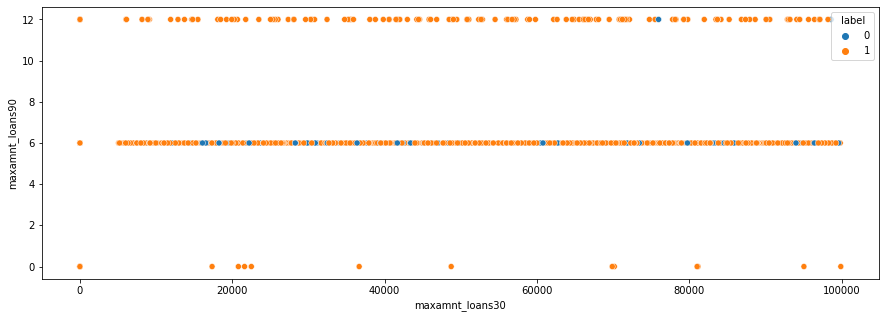

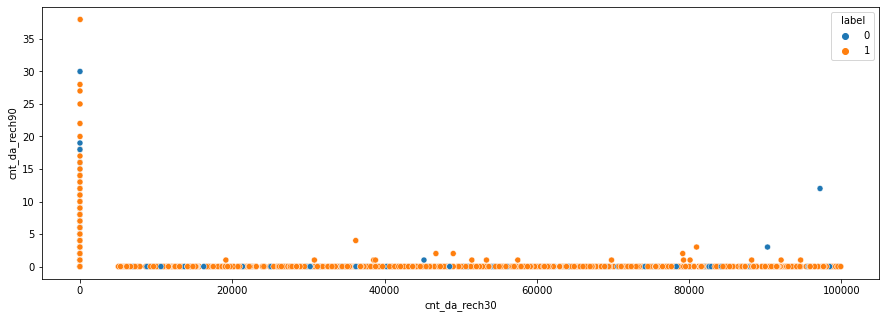

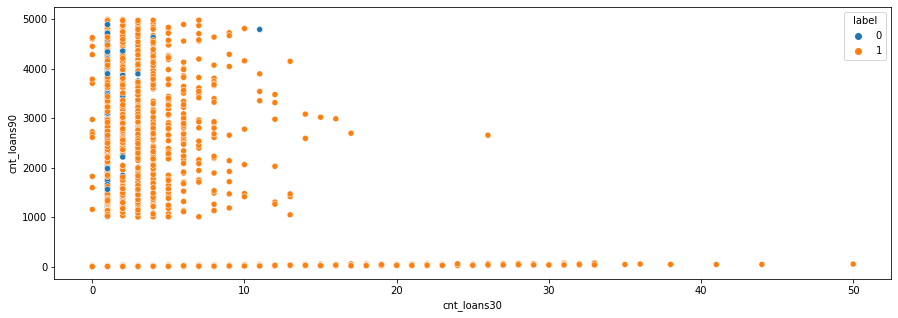

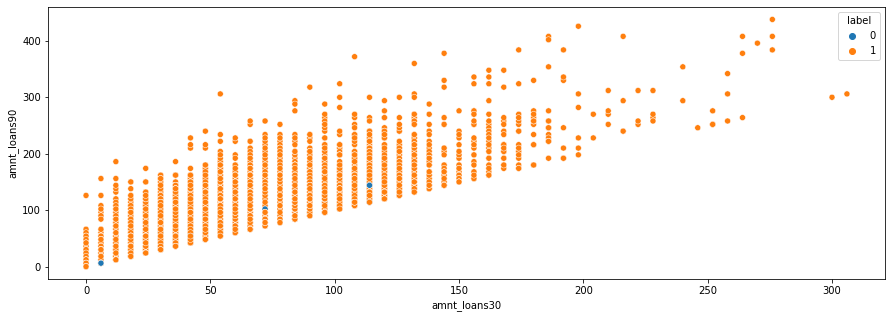

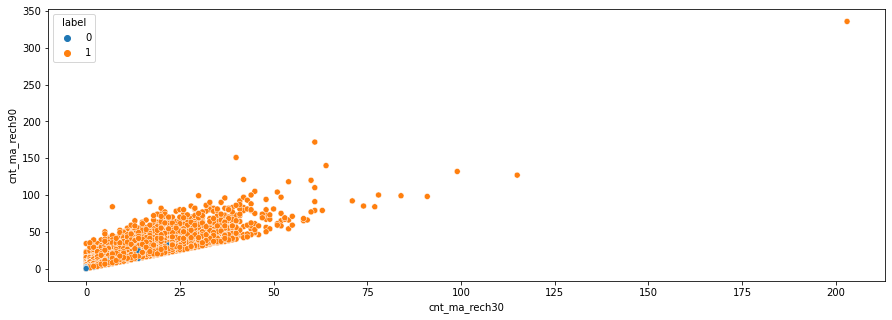

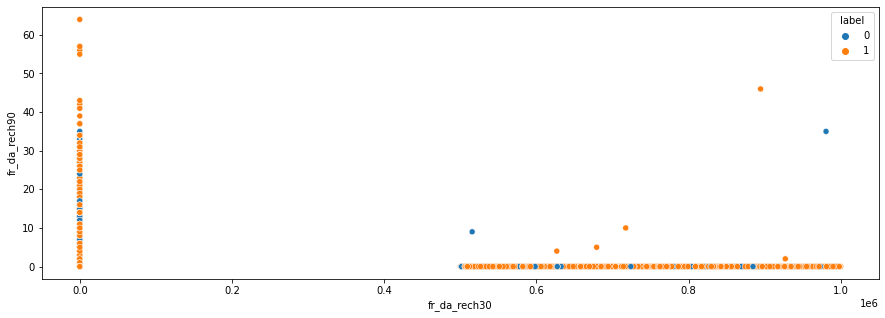

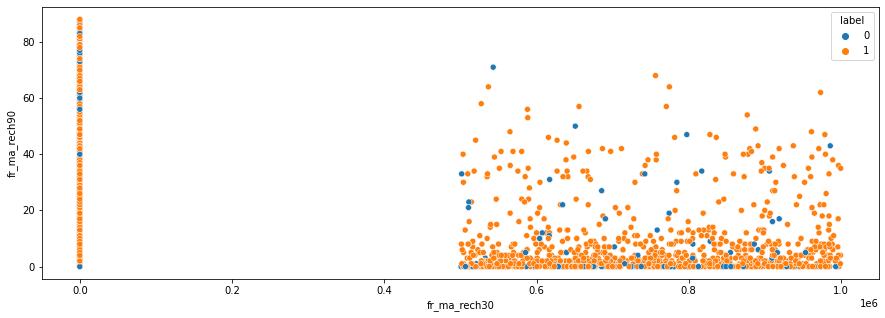

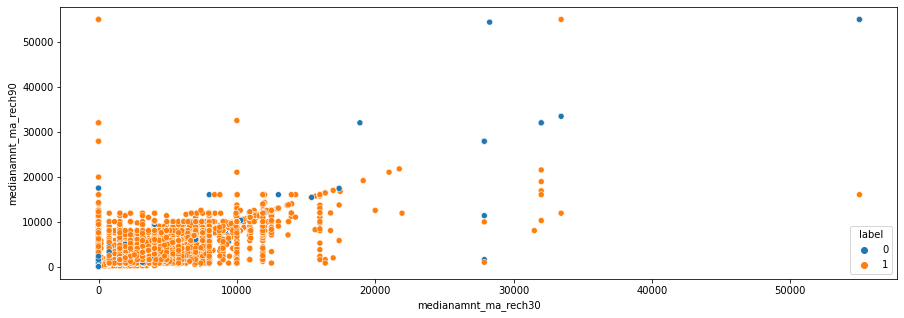

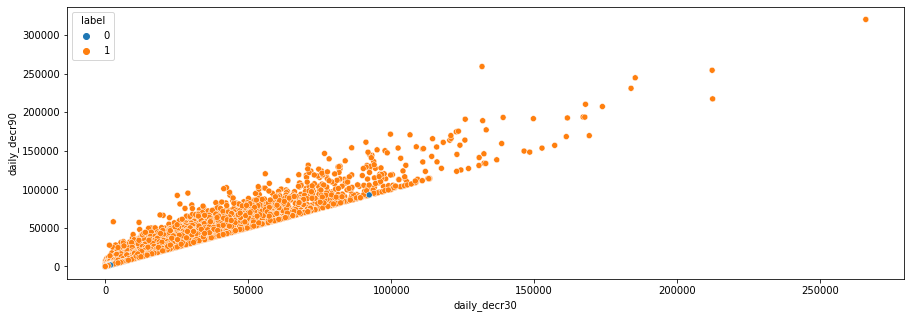

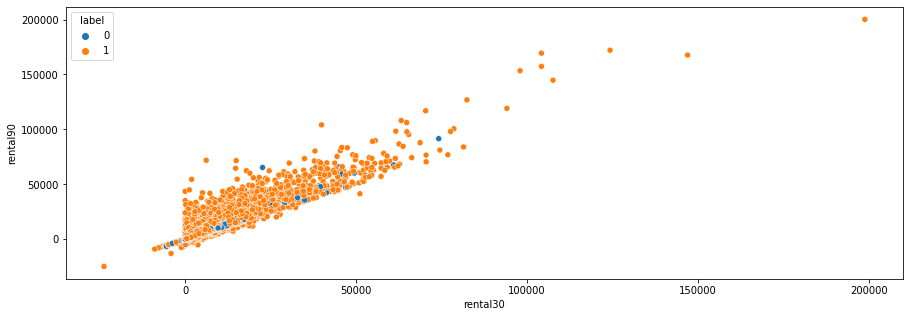

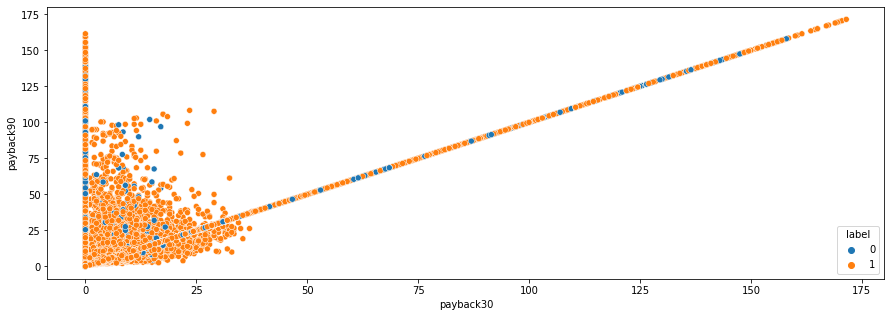

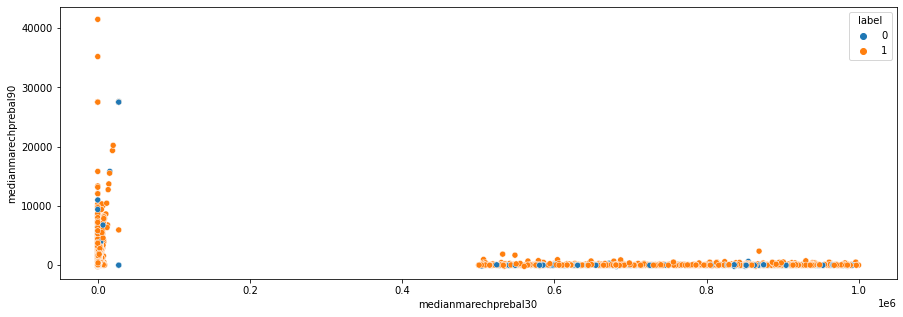

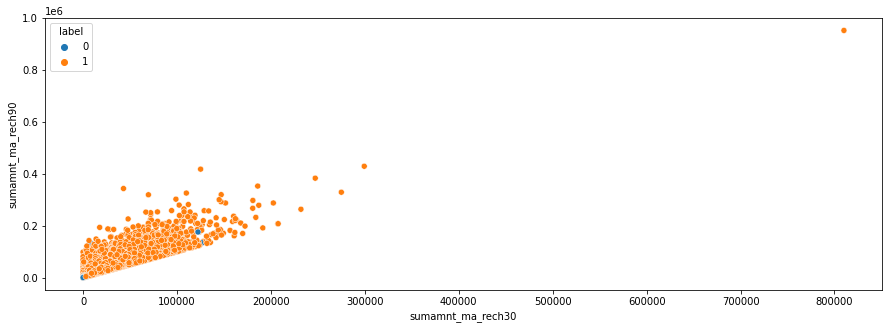

In [24]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_loans30', y='medianamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='maxamnt_loans30', y='maxamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_da_rech30', y='cnt_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_loans30', y='cnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='amnt_loans30', y='amnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_ma_rech30', y='cnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_da_rech30', y='fr_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_ma_rech30', y='fr_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_ma_rech30', y='medianamnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='daily_decr30', y='daily_decr90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='rental30', y='rental90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='payback30', y='payback90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianmarechprebal30', y='medianmarechprebal90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='sumamnt_ma_rech30', y='sumamnt_ma_rech90', data=df, hue='label')

We can see the data distribution and success failure points on those feature columns using the scatter plot, which also shows any outlier characteristics in the dataset.

Histogram

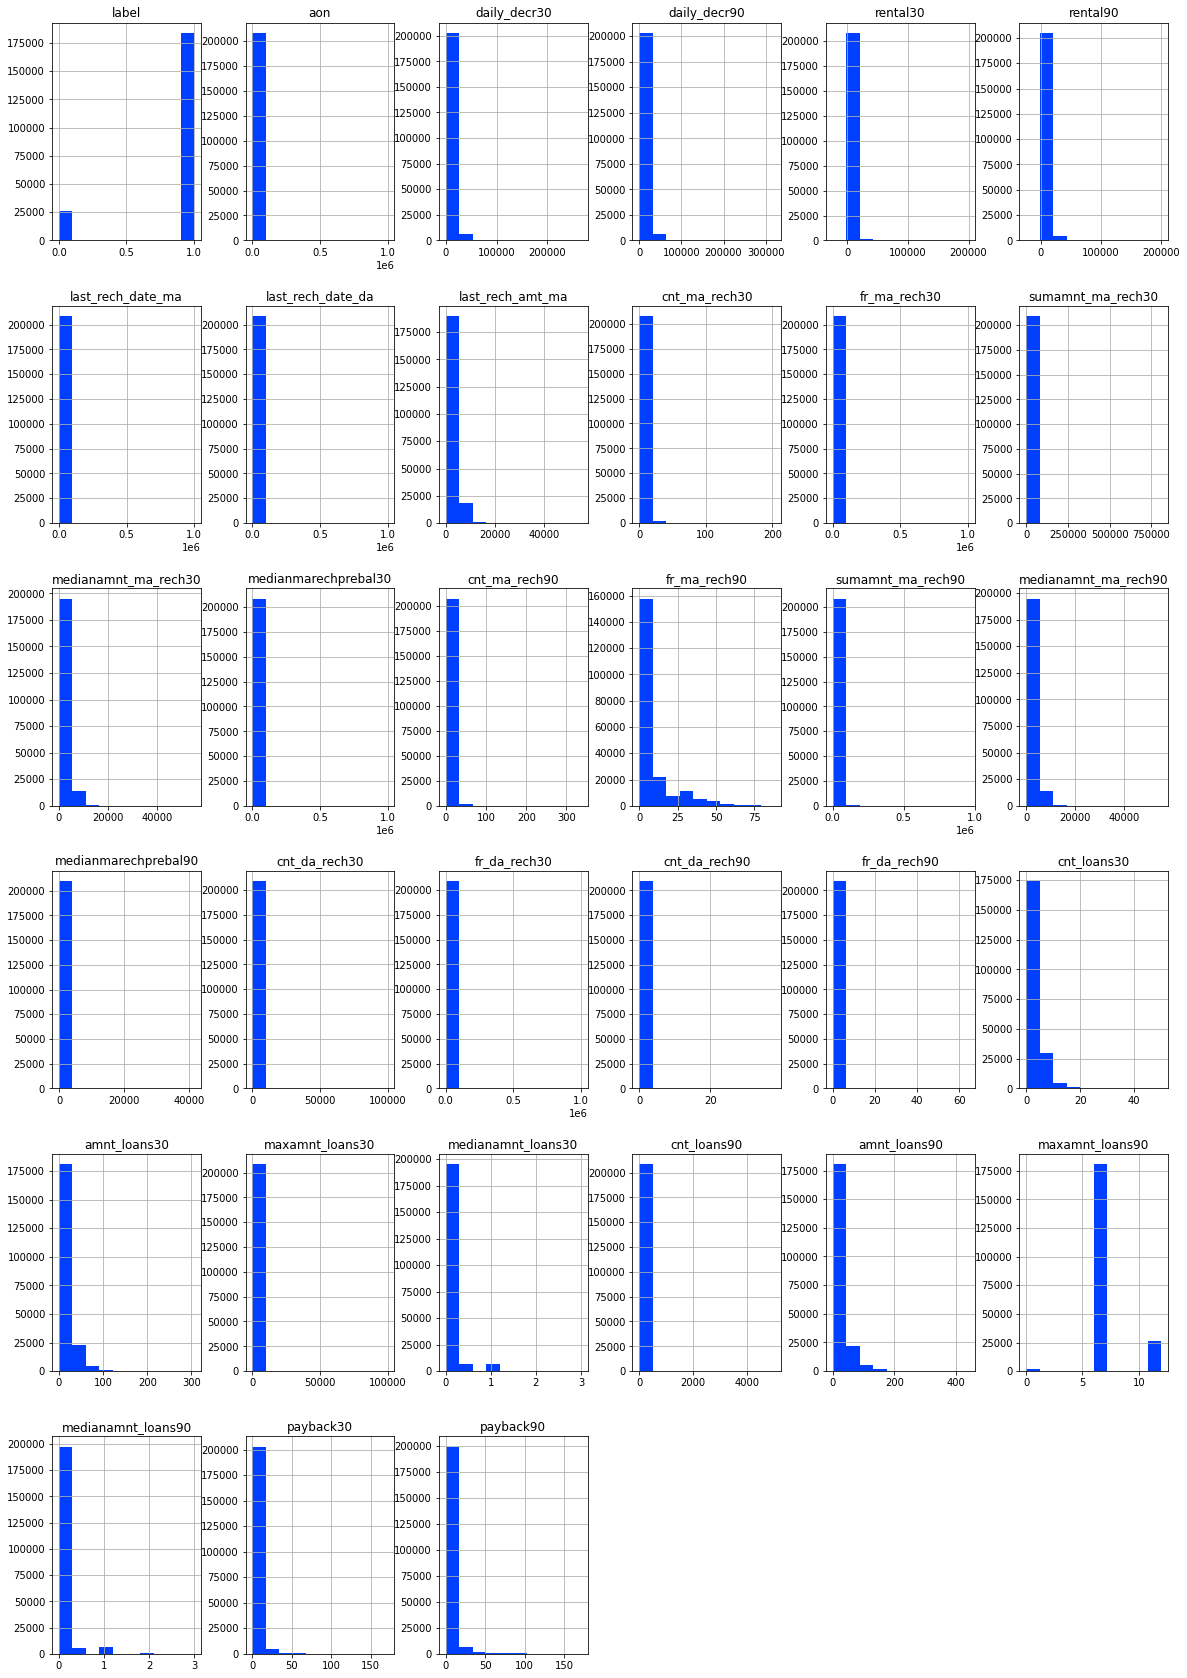

In [25]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,30))
plt.show()

## Observations

#### for aon feature:
- With a mean value of 8112.34, the data spans from -48 to 999860.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature daily_descr30:
- With a mean value of 5381.4, the data runs from -93 to 265926.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature daily_descr90:
- With a mean value of 6082.52, the data spans from -93 to 320630.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature rental30:
- With a mean value of 2692.58, the data spans from -23737.14 to 198926.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such

#### for feature rental90:
- With a mean value of 3483.41, the data spans from -24720 to 200148.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such..

#### for feature last_rech_date_ma:
- With a mean value of 3755.85, the data spans from -29 to 998650.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature last_rech_date_da:
- With a mean value of 3712.2, the data spans from -29 to 999178.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature last_rech_amt_ma:
- The data is in the range of 0 to 55000, with a mean value of 2064.45.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature cnt_ma_rech30:
- With a mean value of 3.98, the data runs from 0 to 203.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature fr_ma_rech30:
- With a mean value of 3737.36, the data spans from 0 to 999606.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature sumamnt_ma_rech30:
- The data is in the range of 0 to 810096, with a mean value of 7704.5.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature medianamnt_ma_rech30:
- With a mean value of 1812.82, the data runs from 0 to 55000.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature medianmarechprebal30:
- With a mean value of 3851.93, the data spans from -200 to 999479.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature cnt_ma_rech90:
- With a mean value of 6.32, the data varies from 0 to 336.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature fr_ma_rech90:
- With a mean value of 7.72, the data runs from 0 to 88.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature sumamnt_ma_rech90:
- With a mean value of 12396.22, the data spans from 0 to 953036.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature medianamnt_ma_rech90:
- The data is not distributed normally or in a well curve and ranges from 0 to 55000 with a mean value of 1864.6.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature medianmarechprebal90:
- With a mean value of 92.03, the data runs from -200 to 41456.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature cnt_da_rech30:
- With a mean value of 262.58, the data spans from 0 to 99914.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature fr_da_rech30:
- With a mean value of 3749.49, the data spans from 0 to 999809.
- The data is not dispersed naturally or in a well-defined pattern.
- Data is widely dispersed and must be treated as such.
- The data is favourably skewed and must be regarded as such.

#### for feature cnt_da_rech90:
- The range of data is 0 to 38, with a mean value of 0.04.
- The data is regularly distributed, but not in a well-shaped curve.
- The data is favourably skewed and must be regarded as such.

#### for feature fr_da_rech90:
- With a mean value of 0.05, the data ranges from 0 to 64.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature cnt_loans30:
- The range of data is 0 to 50, with a mean value of 2.76.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature amnt_loans30:
- With a mean value of 17.95, the data varies from 0 to 306.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature maxamnt_loans30:
- With a mean value of 274.66, the data spans from 0 to 99864.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature medianamnt_loans30:
- With a mean value of 0.05, the data spans from 0 to 3.
- Data is not distributed regularly or in a well-defined curve, which is to be expected given that the characteristic has a limited set of values.
- The data is favourably skewed and must be regarded as such.

#### for feature cnt_loans90:
- With a mean value of 18.52, the data runs from 0 to 4997.52.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature amnt_loans90:
- With a mean value of 23.65, the data runs from 0 to 438.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature maxamnt_loans90:
- The range of data is 0 to 12, with a mean value of 6.7.
- Data is not distributed properly or in a well-defined curve, which is logical given that the user has two borrowing options: 5 and 10 for which 6 and 12 must be paid.
- The data is favourably skewed and must be regarded as such.

#### for feature medianamnt_loans90:
- With a mean value of 0.05, the data spans from 0 to 3.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature payback30:
- With a mean value of 3.4, the data ranges from 0 to 171.5.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

#### for feature payback90:
- With a mean value of 4.32, the data runs from 0 to 171.5.
- The data is not dispersed naturally or in a well-defined pattern.
- The data is favourably skewed and must be regarded as such.

# Correlation 

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [26]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


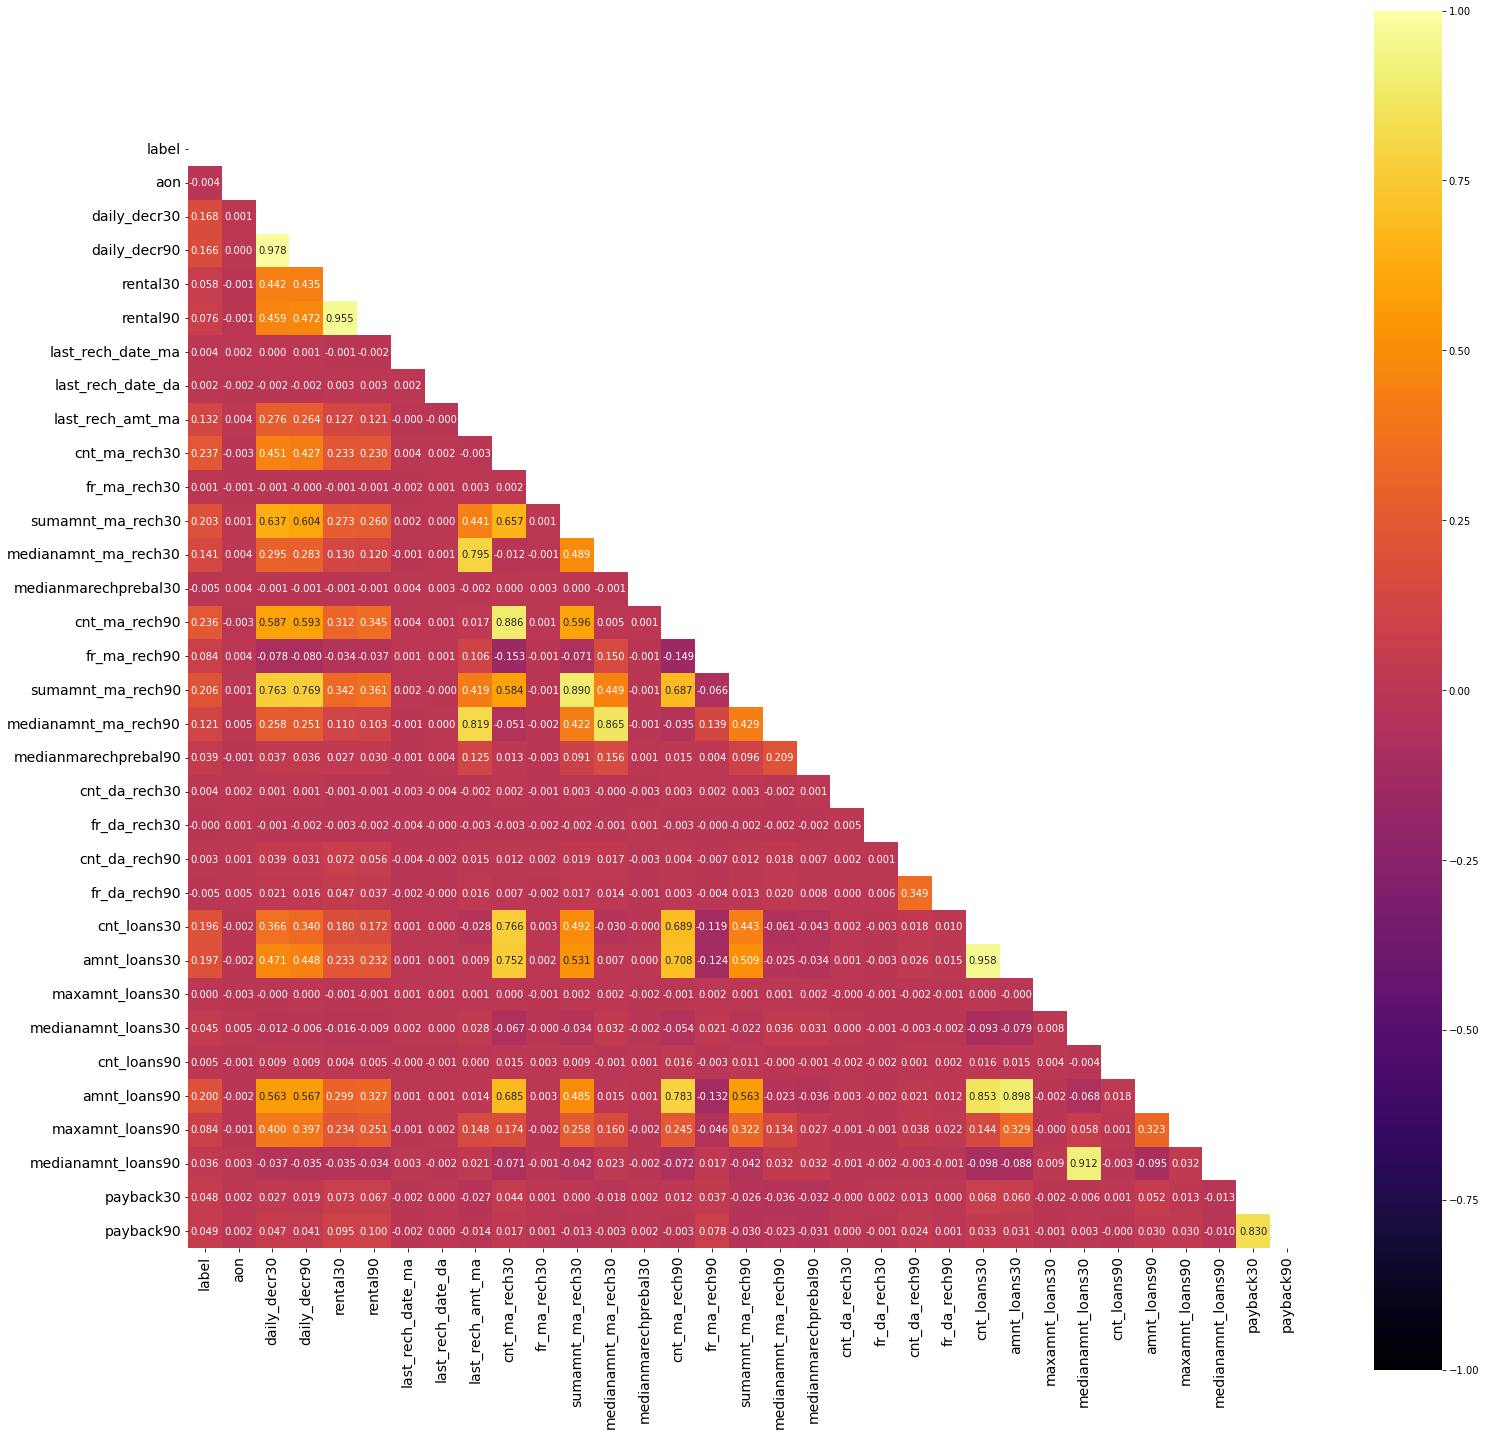

In [27]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can't see the correlation details in the above heatmap owing to the large number of columns, but we can see the colour coding details and get a signal that there is no multicollinearity worry between the column values.

# Correlation Bar Plot comparing Gender column with the remaining columns

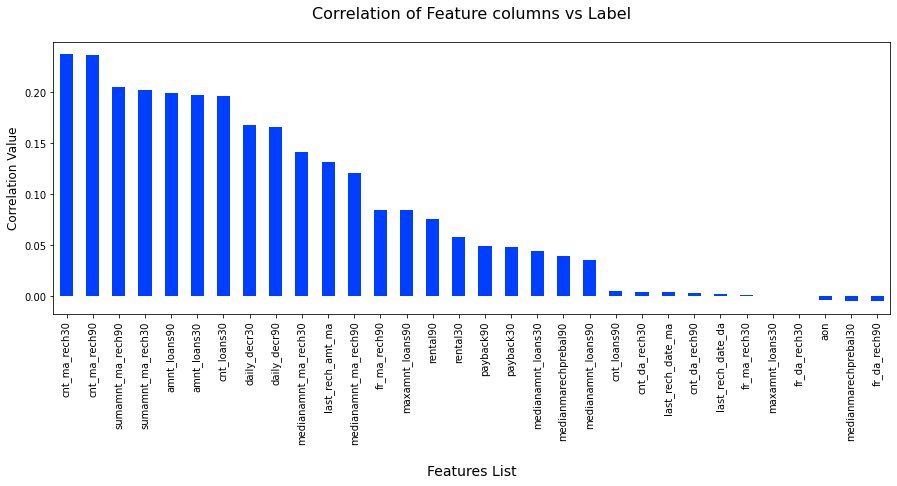

In [28]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['label'].sort_values(ascending=False).drop('label').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

The feature columns that are favourably linked with our label and the feature columns that are negatively correlated with our label are clearly defined in the above Bar Plot.

# Data Preprocessing

In [29]:
df['pdate'] = pd.to_datetime(df['pdate']) # converting from object to datetime

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Date'].value_counts())

2016    209593
Name: Year, dtype: int64
7    85765
6    83154
8    40674
Name: Month, dtype: int64
11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Date, dtype: int64


In [30]:
df.drop(columns=['msisdn', 'pdate', 'Year'], axis=1, inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


I removed columns that were either not required or did not contribute to the label prediction.

# Checking Outliers

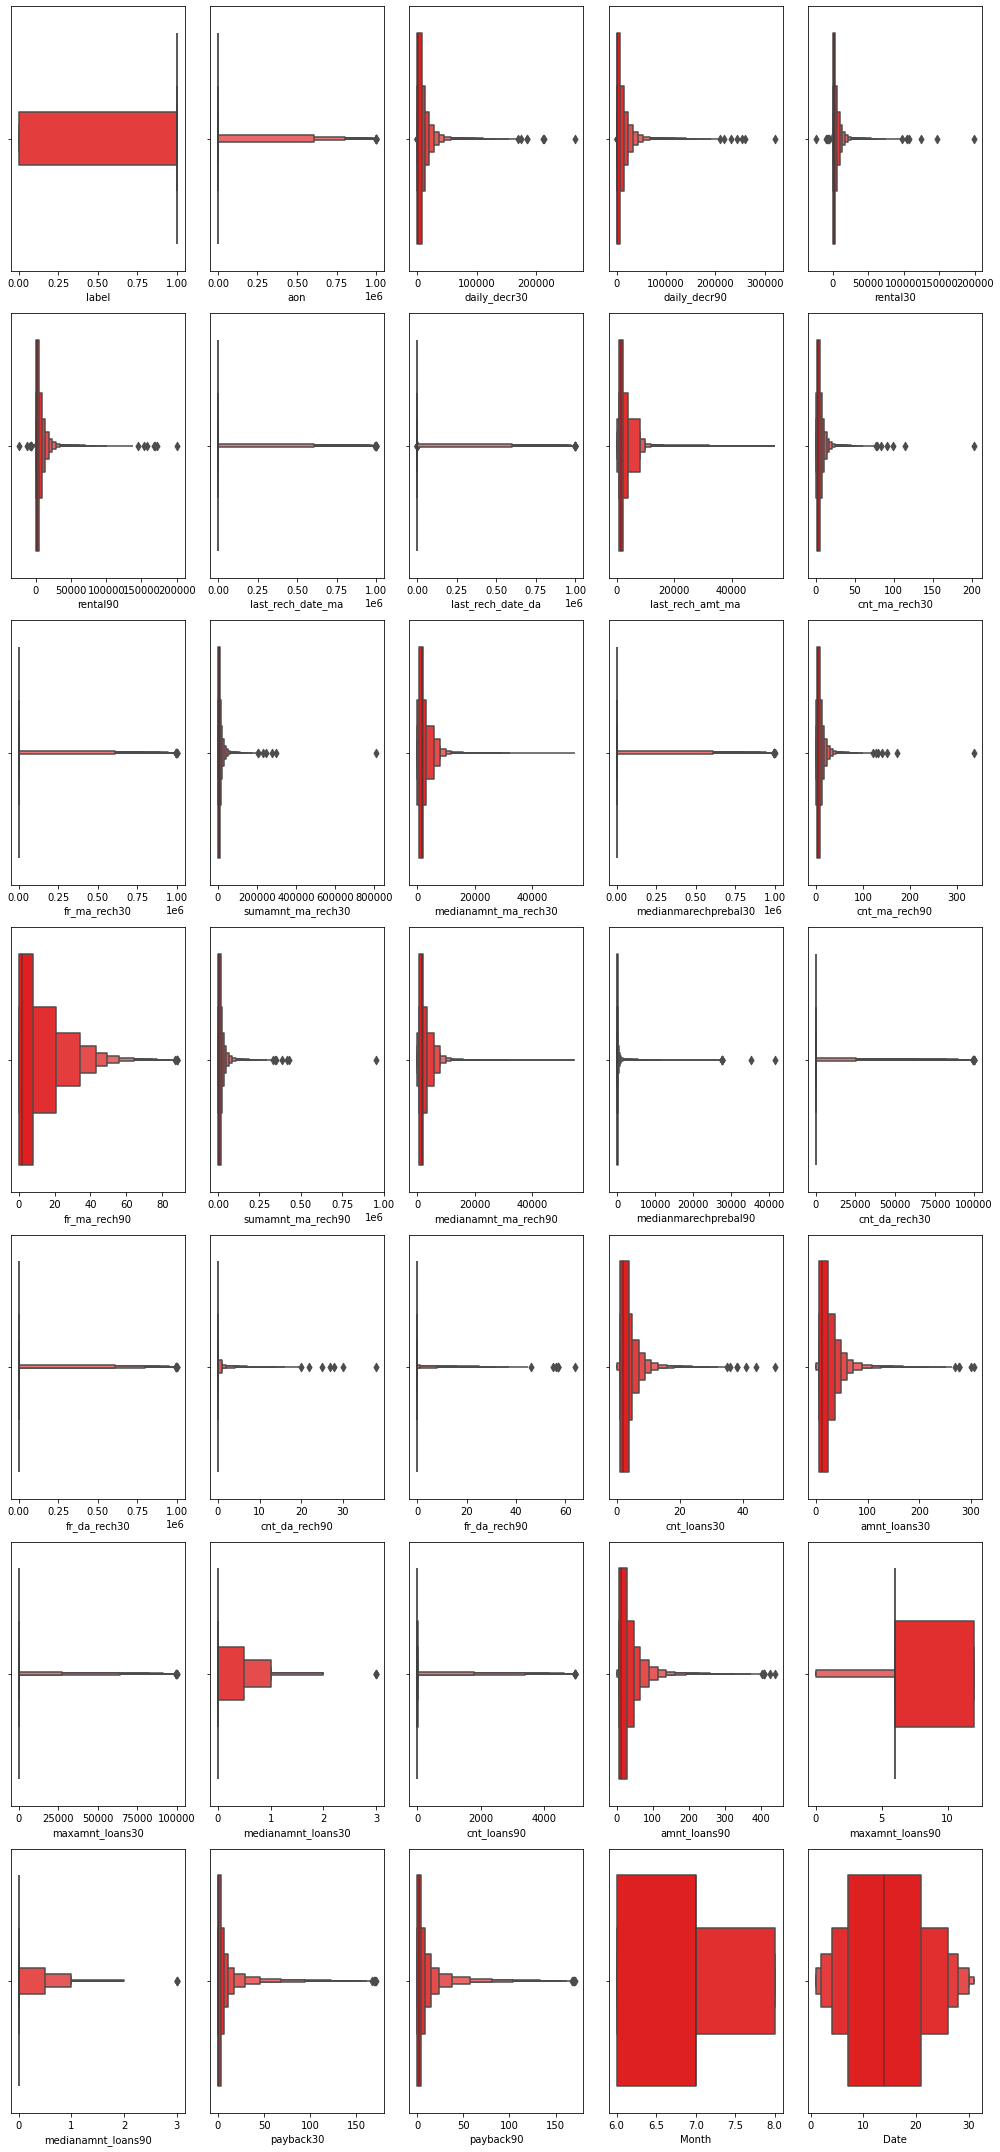

In [31]:
plt.figure(figsize=(14,30))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()

We can see the outlier features in our numerical data columns with the use of a boxen plot. However, when I tried to remove the outliers using the Z score or IQR methods, I lost close to 25% of the data, therefore I kept all of the data points as they were to avoid any NaN results.

# Checking Skewness

In [32]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

We can observe that there are columns in our dataset that are above the permitted range of +/-0.5 value using the skew approach.

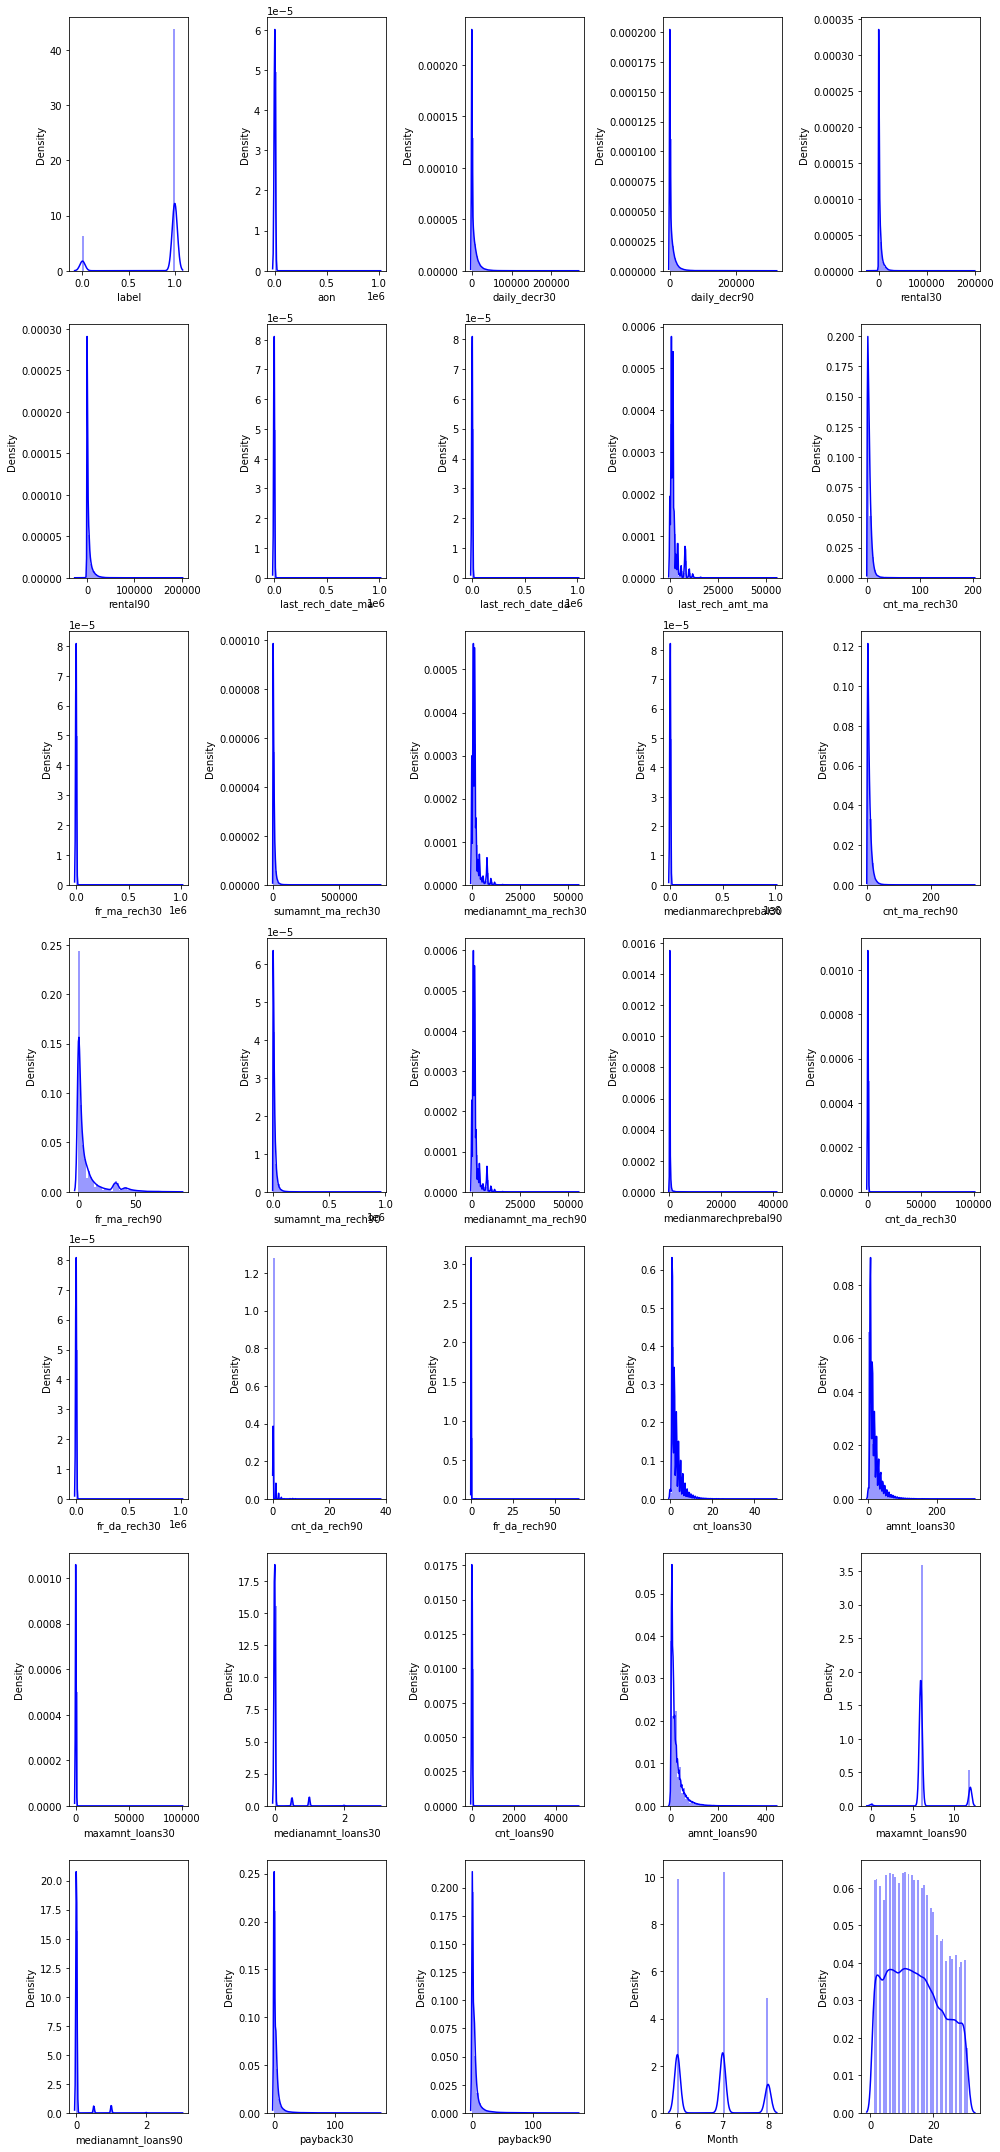

In [33]:
plt.figure(figsize=(14,30))
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.distplot(df[outl_df[i]], color='blue')
    plt.tight_layout()

We can see the skewness information in our numerical data columns using the distribution plot. I tried using log transformation to lessen the skewness, but that resulted in NaN values in our dataset, therefore I'm trying to avoid that by utilising somewhat skewed data.

# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [34]:
X = df.drop('label', axis=1)
Y = df['label']

The dataset has been divided into features and labels, with X denoting all feature columns and Y denoting the target label column.

# Using SMOTE to take care of class imbalance

In [35]:
 Y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

we can see that the data is imbalanced

In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [37]:
 Y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

After applying over sampling, we list the values of our label column once more to double-check the modified data. We can see that the class imbalance problem has been fixed, and all of the categories now have the same data, ensuring that the machine learning model is not biassed towards one group.

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.10529886, -0.07394786, -0.10770463, ...,  2.51648322,
         0.52904532,  0.75437657],
       [-0.09959784,  1.13103968,  0.91996482, ..., -0.37283872,
         2.01847907, -0.53308441],
       [-0.1018912 , -0.29416795, -0.29681664, ..., -0.37283872,
         2.01847907,  0.62563047],
       ...,
       [-0.09974261,  0.10325576,  0.04565188, ...,  0.23627498,
         0.52904532, -0.01810002],
       [-0.10339513, -0.28230373, -0.28530575, ..., -0.20944249,
         0.52904532, -0.01810002],
       [-0.09859494, -0.36323995, -0.35562329, ...,  2.42829115,
         0.52904532, -1.1768149 ]])

# Power Transform

In [39]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')
X

array([[-0.5825855 ,  0.70484119,  0.64605372, ...,  1.9948384 ,
         0.66823511,  0.77735999],
       [ 0.1361098 ,  1.70399844,  1.69226138, ..., -0.77124875,
         1.72369211, -0.49972295],
       [-0.14439752,  0.0174075 , -0.02644672, ..., -0.77124875,
         1.72369211,  0.65787321],
       ...,
       [ 0.11873406,  1.04344188,  0.99678269, ...,  1.35839586,
         0.66823511,  0.03577686],
       [-0.33456764,  0.06358872,  0.02350851, ...,  0.18542573,
         0.66823511,  0.03577686],
       [ 0.25527096, -0.27497052, -0.30224906, ...,  1.99088636,
         0.66823511, -1.20772338]])

# Finding the best random state

importing necessary libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [41]:
maxAccu=0
maxRS=0

for i in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.3949147367962 on Random State 2


# Using the best Random State to create the training and testing data sets

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

I divided the complete dataset into 75:25 training and testing pieces so that our classification model can learn on the training dataset before testing its accuracy on the unknown testing dataset.

# Machine Learning Model for Classification 

In [43]:
def classify(model_func):
    
    for model_name, model in model_func.items():
        
        # Training the model
        model.fit(X_train, Y_train)
    
        # Predicting Y_test
        pred = model.predict(X_test)
        
        print('\n-------------------------------------------------',model_name,'-------------------------------------------------------------')
        
        # Classification Report
        class_report = classification_report(Y_test, pred)
        print("\nClassification Report for {}:\n".format(model_name), class_report)
    
        # Accuracy Score
        acc_score = (accuracy_score(Y_test, pred))*100
        print("Accuracy Score for {}:".format(model_name), acc_score)
    
        # Cross Validation Score
        cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
        print("Cross Validation Score for {}:".format(model_name), cv_score)
    
        # Result of accuracy minus cv scores
        result = acc_score - cv_score
        print("\nAccuracy Score - Cross Validation Score is", result)

For any machine learning model that calls for this function, I've defined a class that will perform the train-test split, machine learning model training, predicting label value, getting the accuracy score, generating the classification report, getting the cross validation score, and the result of the difference between the accuracy score and cross validation score.

In [44]:
LR = LogisticRegression()
ETC = ExtraTreesClassifier()
SVCM = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
DTC = DecisionTreeClassifier(max_depth=15, random_state=21)
RFC = RandomForestClassifier(max_depth=15, random_state=111)
KNN = KNeighborsClassifier(n_neighbors=15)

models = {'Logistic Regression' : LR,
         'Extra Trees Classifier' : ETC,
         'Support Vector Classifier' : SVCM,
         'Decision Tree Classifier' : DTC,
         'Random Forest Classfier' : RFC,
         'K Nearest Neighbors Classifier' : KNN}

  calling the Classification Machine Learning model function

In [45]:
classify(models)


------------------------------------------------- Logistic Regression -------------------------------------------------------------

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81     45714
           1       0.82      0.78      0.80     46002

    accuracy                           0.80     91716
   macro avg       0.80      0.80      0.80     91716
weighted avg       0.80      0.80      0.80     91716

Accuracy Score for Logistic Regression: 80.37419861311004
Cross Validation Score for Logistic Regression: 79.99902555645006

Accuracy Score - Cross Validation Score is 0.3751730566599747

------------------------------------------------- Extra Trees Classifier -------------------------------------------------------------

Classification Report for Extra Trees Classifier:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     45714
       

choosing extra tress classifer as it is giving a high accuracy with minimum cross validation score

# Hyper parameter tuning on the best Classification ML Model

In [46]:
fmod_param = {'criterion' : ["gini", "entropy"],
              'max_depth' : [30, 40],
              'n_estimators' : [300, 350],
              'min_samples_split' : [3, 4],
              'random_state' : [42, 72]
             }

GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_split': 3,
 'n_estimators': 350,
 'random_state': 42}

After analysing all of the classification models, I chose Extra Trees Classifier as my best model, and I've written its settings above using the sklearn homepage as a reference. For hyper parameter tuning my best model, I'm using the Grid Search CV approach. I've given the Grid Search CV a list of factors I believe it should examine for the best results. So, out of all the options it used to train the model, the Grid Search CV has presented me with the optimal parameter list that I can use on my final model.

In [52]:
Final_Model = ExtraTreesClassifier(criterion="entropy", max_depth=40, min_samples_split=3, 
                                   n_estimators=350, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 94.68031750185355


# AUC ROC Curve

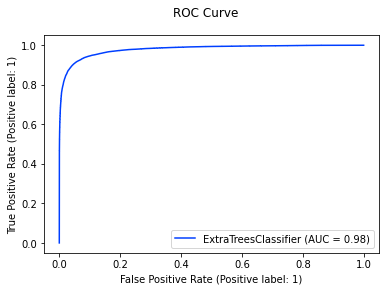

In [48]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

The ROC Curve for my final model has been built, and it displays the AUC score as well as the curve details.

# Confusion Matrix

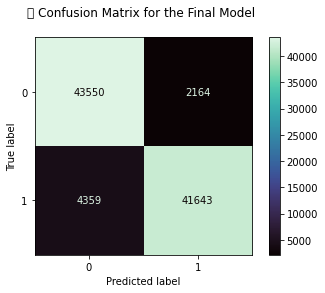

In [49]:
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for the Final Model \n')
plt.show()

I can understand the number of times I obtained the proper outputs and the number of times my final model failed to produce the correct prediction using the aforesaid confusion matrix (depicting in the black boxes)

# Saving the final model

In [50]:
filename = "FinalModel_MicroCreditLoanDefaulter.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_MicroCreditLoanDefaulter.pkl']

To store the final classification model, I have used the joblib option, although it may also be done with pickle.

# Loading the final model

In [51]:
load_model = joblib.load(filename)
result = load_model.score(X_test, Y_test)*100
print(result)

92.88782764185093


# Conclusion:

The final model allows MFIs to determine whether or not a person will repay money and whether or not an MFI should issue a load to that person based on the different variables taken into account.


Learning Outcomes of the Study in Data Science: To improve accuracy, I developed many classification models rather than relying on a single model, and I used cross validation comparison to guarantee that the model did not suffer from overfitting or underfitting. To improve the scores, I chose the best one and did hyper parameter tuning on it.


Limitations of this work and Future Research: The limitation is that it will only function for this specific use case and will not work for any other, If used in a different circumstance but on a similar scale, it will need to be adjusted. The scope is that we can use it in companies to determine whether we should provide a loan to a person or not, and we can also make predictions about a person purchasing an expensive service based on personal details that we have in this dataset, such as the number of times the data account has been recharged in the last 30 days and the daily amount spent from the main account, averaged over the last 30 days (in Indonesian Rupiah), so even a marketing firm can use it.